In [1]:
import pandas as pd
import numpy as np

In [2]:
sub = pd.read_csv("./subway_seoul(+address).csv")
weather = pd.read_csv("./pre_tem_merge.csv")

sub.head()

,날짜,역명,승차총승객수,하차총승객수,역명2,호선,역전화번호,도로명주소,지번주소,자치구
0,2019-01-01,을지로4가역,3862,3728,2호선 을지로4가역,2호선,02-6110-2041,서울특별시 중구 을지로 지하178(을지로4가),서울특별시 중구 을지로4가 267-1 을지로4가역(2호선),중구
1,2019-01-01,을지로3가역,8104,7554,2호선 을지로3가역,2호선,02-6110-2031,서울특별시 중구 을지로 지하106(을지로3가),서울특별시 중구 을지로3가 347-3 을지로3가역(2호선),중구
2,2019-01-01,을지로입구역,22478,21330,2호선 을지로입구역,2호선,02-6110-2021,서울특별시 중구 을지로 지하42(을지로1가),서울특별시 중구 을지로1가 100-1 을지로입구역(2호선),중구
3,2019-01-01,시청역,8381,6049,2호선 시청역,2호선,02-6110-2011,서울특별시 중구 서소문로 지하127(서소문동),서울특별시 중구 서소문동 90-1 시청역(2호선),중구
4,2019-01-01,동묘앞역,8045,8504,1호선 동묘앞역,1호선,02-6110-1271,서울특별시 종로구 종로 359(숭인동),서울특별시 종로구 숭인동 117 동묘앞역(1호선),종로구


In [3]:
weather.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm)
0,2019-01-01,-5.0,-8.2,-0.6,NaN
1,2019-01-02,-4.9,-8.8,0.2,NaN
2,2019-01-03,-3.5,-8.4,3.2,NaN
3,2019-01-04,-1.1,-6.2,4.1,NaN
4,2019-01-05,-2.8,-5.5,1.1,NaN


In [4]:
# '날짜' 컬럼을 기준으로 두 데이터프레임을 합치기
merged_df = pd.merge(sub, weather, on='날짜')
merged_df.head()

,날짜,역명,승차총승객수,하차총승객수,역명2,호선,역전화번호,도로명주소,지번주소,자치구,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm)
0,2019-01-01,을지로4가역,3862,3728,2호선 을지로4가역,2호선,02-6110-2041,서울특별시 중구 을지로 지하178(을지로4가),서울특별시 중구 을지로4가 267-1 을지로4가역(2호선),중구,-5.0,-8.2,-0.6,NaN
1,2019-01-01,을지로3가역,8104,7554,2호선 을지로3가역,2호선,02-6110-2031,서울특별시 중구 을지로 지하106(을지로3가),서울특별시 중구 을지로3가 347-3 을지로3가역(2호선),중구,-5.0,-8.2,-0.6,NaN
2,2019-01-01,을지로입구역,22478,21330,2호선 을지로입구역,2호선,02-6110-2021,서울특별시 중구 을지로 지하42(을지로1가),서울특별시 중구 을지로1가 100-1 을지로입구역(2호선),중구,-5.0,-8.2,-0.6,NaN
3,2019-01-01,시청역,8381,6049,2호선 시청역,2호선,02-6110-2011,서울특별시 중구 서소문로 지하127(서소문동),서울특별시 중구 서소문동 90-1 시청역(2호선),중구,-5.0,-8.2,-0.6,NaN
4,2019-01-01,동묘앞역,8045,8504,1호선 동묘앞역,1호선,02-6110-1271,서울특별시 종로구 종로 359(숭인동),서울특별시 종로구 숭인동 117 동묘앞역(1호선),종로구,-5.0,-8.2,-0.6,NaN


In [5]:
merged_df.to_csv("./sub_pre_tem_merge.csv", index=False)

[ 버스 데이터 ]

In [6]:
bus = pd.read_csv("./bus_seoul.csv")
weather = pd.read_csv("./pre_tem_merge.csv")

bus.head()

,사용일자,노선번호,노선명,역명,승차총승객수,하차총승객수,자치구
0,2019-01-01,100,100번(하계동~용산구청),한성여객종점,10,0,노원구
1,2019-01-01,100,100번(하계동~용산구청),노원평생학습관,5,0,노원구
2,2019-01-01,100,100번(하계동~용산구청),중계역,27,1,노원구
3,2019-01-01,100,100번(하계동~용산구청),중계목화아파트4단지,110,12,노원구
4,2019-01-01,100,100번(하계동~용산구청),인덕대학,87,76,노원구


In [7]:
# 컬럼명 변경
bus = bus.rename(columns={'사용일자':'날짜'})
bus.head()

,날짜,노선번호,노선명,역명,승차총승객수,하차총승객수,자치구
0,2019-01-01,100,100번(하계동~용산구청),한성여객종점,10,0,노원구
1,2019-01-01,100,100번(하계동~용산구청),노원평생학습관,5,0,노원구
2,2019-01-01,100,100번(하계동~용산구청),중계역,27,1,노원구
3,2019-01-01,100,100번(하계동~용산구청),중계목화아파트4단지,110,12,노원구
4,2019-01-01,100,100번(하계동~용산구청),인덕대학,87,76,노원구


In [8]:
weather.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm)
0,2019-01-01,-5.0,-8.2,-0.6,NaN
1,2019-01-02,-4.9,-8.8,0.2,NaN
2,2019-01-03,-3.5,-8.4,3.2,NaN
3,2019-01-04,-1.1,-6.2,4.1,NaN
4,2019-01-05,-2.8,-5.5,1.1,NaN


In [9]:
# '날짜' 컬럼을 기준으로 두 데이터프레임을 합치기
merged_df1 = pd.merge(bus, weather, on='날짜')
merged_df1.head()

,날짜,노선번호,노선명,역명,승차총승객수,하차총승객수,자치구,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm)
0,2019-01-01,100,100번(하계동~용산구청),한성여객종점,10,0,노원구,-5.0,-8.2,-0.6,NaN
1,2019-01-01,100,100번(하계동~용산구청),노원평생학습관,5,0,노원구,-5.0,-8.2,-0.6,NaN
2,2019-01-01,100,100번(하계동~용산구청),중계역,27,1,노원구,-5.0,-8.2,-0.6,NaN
3,2019-01-01,100,100번(하계동~용산구청),중계목화아파트4단지,110,12,노원구,-5.0,-8.2,-0.6,NaN
4,2019-01-01,100,100번(하계동~용산구청),인덕대학,87,76,노원구,-5.0,-8.2,-0.6,NaN


In [10]:
merged_df1.to_csv("./bus_pre_tem_merge.csv", index=False)

In [11]:
df = pd.read_csv("./bus_pre_tem_merge.csv")
df.head()

,날짜,노선번호,노선명,역명,승차총승객수,하차총승객수,자치구,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm)
0,2019-01-01,100,100번(하계동~용산구청),한성여객종점,10,0,노원구,-5.0,-8.2,-0.6,NaN
1,2019-01-01,100,100번(하계동~용산구청),노원평생학습관,5,0,노원구,-5.0,-8.2,-0.6,NaN
2,2019-01-01,100,100번(하계동~용산구청),중계역,27,1,노원구,-5.0,-8.2,-0.6,NaN
3,2019-01-01,100,100번(하계동~용산구청),중계목화아파트4단지,110,12,노원구,-5.0,-8.2,-0.6,NaN
4,2019-01-01,100,100번(하계동~용산구청),인덕대학,87,76,노원구,-5.0,-8.2,-0.6,NaN


In [12]:
df['총승객수'] = df['승차총승객수'] + df['하차총승객수']

In [13]:
# '날짜'를 기준으로 그룹화하여 '자치구' 컬럼 안에 같은 값들끼리 묶고, '총승객수' 컬럼 안에 있는 값들 더하기
grouped_df = df.groupby(['날짜', '자치구'])['총승객수'].sum().reset_index()

In [14]:
grouped_df.to_csv("./grouped gu_bus_seoul.csv", index=False)

In [15]:
bus = pd.read_csv("./grouped gu_bus_seoul.csv")
bus.head()

,날짜,자치구,총승객수
0,2019-01-01,강남구,218303
1,2019-01-01,강동구,99598
2,2019-01-01,강북구,210834
3,2019-01-01,강서구,182192
4,2019-01-01,관악구,315459


In [16]:
weather = pd.read_csv("./pre_tem_merge.csv")
weather.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm)
0,2019-01-01,-5.0,-8.2,-0.6,NaN
1,2019-01-02,-4.9,-8.8,0.2,NaN
2,2019-01-03,-3.5,-8.4,3.2,NaN
3,2019-01-04,-1.1,-6.2,4.1,NaN
4,2019-01-05,-2.8,-5.5,1.1,NaN


In [17]:
# '날짜' 컬럼을 기준으로 두 데이터프레임을 합치기
merged_bus = pd.merge(bus, weather, on='날짜')
merged_bus.head()

,날짜,자치구,총승객수,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm)
0,2019-01-01,강남구,218303,-5.0,-8.2,-0.6,NaN
1,2019-01-01,강동구,99598,-5.0,-8.2,-0.6,NaN
2,2019-01-01,강북구,210834,-5.0,-8.2,-0.6,NaN
3,2019-01-01,강서구,182192,-5.0,-8.2,-0.6,NaN
4,2019-01-01,관악구,315459,-5.0,-8.2,-0.6,NaN


- 폭염: 일 최고기온이 33°C 이상인 날
- 한파: 아침 최저기온(03:01~09:00)이 영하 12도 이하인 날

버스-폭염 데이터 추출

In [18]:
# '최고기온'이 33.0 이상인 행들을 '자치구'별로 그룹화하고 해당하는 '총승객수' 컬럼 값 더하기
heat = merged_bus[merged_bus['최고기온(℃)'] >= 33.0].groupby('자치구')['총승객수'].sum()
heat

자치구
강남구     34192796
강동구     12334346
강북구     20861644
강서구     20867282
관악구     31783029
광진구     11978503
구로구     22466627
금천구     16243177
노원구     18052431
도봉구     14440098
동대문구    22272287
동작구     22157647
마포구     22746898
서대문구    25006393
서초구     30549548
성동구     12063448
성북구     25856368
송파구     23739452
양천구     17225136
영등포구    25177347
용산구     17570662
은평구     22045371
종로구     22018184
중구      15539454
중랑구     16029006
Name: 총승객수, dtype: int64

In [19]:
heat_df = pd.DataFrame({'자치구': heat.index, '총승객수': heat.values})
heat_df

,자치구,총승객수
0,강남구,34192796
1,강동구,12334346
2,강북구,20861644
3,강서구,20867282
4,관악구,31783029
5,광진구,11978503
6,구로구,22466627
7,금천구,16243177
8,노원구,18052431
9,도봉구,14440098


In [20]:
heat_df.to_csv("./bus_heatwave_total.csv", index=False)

버스-한파 데이터 추출

In [21]:
cold = merged_bus[merged_bus['최저기온(℃)'] <= -12.0].groupby('자치구')['총승객수'].sum()
cold

자치구
강남구     8686489
강동구     3366560
강북구     5643998
강서구     5543687
관악구     8482194
광진구     3283317
구로구     5954170
금천구     4421245
노원구     4896104
도봉구     3915957
동대문구    6101492
동작구     5684380
마포구     5903263
서대문구    6661480
서초구     7625769
성동구     3191979
성북구     7044794
송파구     6496636
양천구     4647603
영등포구    6724349
용산구     4505683
은평구     5878305
종로구     5701584
중구      4017974
중랑구     4438114
Name: 총승객수, dtype: int64

In [22]:
cold_df = pd.DataFrame({'자치구': cold.index, '총승객수': cold.values})
cold_df

,자치구,총승객수
0,강남구,8686489
1,강동구,3366560
2,강북구,5643998
3,강서구,5543687
4,관악구,8482194
5,광진구,3283317
6,구로구,5954170
7,금천구,4421245
8,노원구,4896104
9,도봉구,3915957


In [23]:
cold_df.to_csv("./bus_coldwave_total.csv", index=False)

버스-강수량 데이터 추출

In [24]:
# '강수량' 컬럼 값이 0.0 또는 NaN인 행들을 필터링
pre = merged_bus[(merged_bus['강수량(mm)'] != 0.0) & (~merged_bus['강수량(mm)'].isna())]

# '자치구'별로 데이터프레임을 그룹화하고 해당하는 '총승객수' 컬럼 값 더하기
pre_sum = pre.groupby('자치구')['총승객수'].sum()
pre_sum

자치구
강남구     250735049
강동구      93228312
강북구     155683437
강서구     155295564
관악구     238588949
광진구      89516324
구로구     167784340
금천구     121029910
노원구     138251854
도봉구     108768096
동대문구    170076754
동작구     167309369
마포구     166814306
서대문구    189249772
서초구     226208868
성동구      89480845
성북구     198777034
송파구     177890930
양천구     129305413
영등포구    185546115
용산구     129819403
은평구     164749129
종로구     166752442
중구      114985192
중랑구     120591406
Name: 총승객수, dtype: int64

In [25]:
pre_df = pd.DataFrame({'자치구': pre_sum.index, '총승객수': pre_sum.values})
pre_df

,자치구,총승객수
0,강남구,250735049
1,강동구,93228312
2,강북구,155683437
3,강서구,155295564
4,관악구,238588949
5,광진구,89516324
6,구로구,167784340
7,금천구,121029910
8,노원구,138251854
9,도봉구,108768096


In [26]:
pre_df.to_csv("./bus_precipitation_total.csv", index=False)

[ 지하철 데이터]

In [ ]:
sub = pd.read_csv("./subway_seoul(+address).csv")
weather = pd.read_csv("./pre_tem_merge.csv")

sub.head()

In [ ]:
# '날짜' 컬럼을 기준으로 두 데이터프레임을 합치기
merged_df2 = pd.merge(sub, weather, on='날짜')
merged_df2.head()

In [ ]:
merged_df2.to_csv("./sub_pre_tem_merge.csv", index=False)

In [ ]:
df1 = pd.read_csv("./sub_pre_tem_merge.csv")
df1.head()

In [ ]:
df1['총승객수'] = df1['승차총승객수'] + df1['하차총승객수']

In [ ]:
# '날짜'를 기준으로 그룹화하여 '자치구' 컬럼 안에 같은 값들끼리 묶고, '총승객수' 컬럼 안에 있는 값들 더하기
grouped_df1 = df.groupby(['날짜', '자치구'])['총승객수'].sum().reset_index()

In [ ]:
grouped_df1.to_csv("./grouped gu_sub_seoul.csv", index=False)

In [ ]:
sub = pd.read_csv("./grouped gu_sub_seoul.csv")
sub.head()

In [ ]:
# '날짜' 컬럼을 기준으로 두 데이터프레임을 합치기
merged_sub = pd.merge(sub, weather, on='날짜')
merged_sub.head()

- 폭염: 일 최고기온이 33°C 이상인 날
- 한파: 아침 최저기온(03:01~09:00)이 영하 12도 이하인 날

지하철-폭염 데이터 추출

In [ ]:
# '최고기온'이 33.0 이상인 행들을 '자치구'별로 그룹화하고 해당하는 '총승객수' 컬럼 값 더하기
heat = merged_sub[merged_sub['최고기온(℃)'] >= 33.0].groupby('자치구')['총승객수'].sum()
heat

In [ ]:
heat_df = pd.DataFrame({'자치구': heat.index, '총승객수': heat.values})
heat_df

In [ ]:
heat_df.to_csv("./sub_heatwave_total.csv", index=False)

지하철-한파 데이터 추출

In [ ]:
cold = merged_sub[merged_sub['최저기온(℃)'] <= -12.0].groupby('자치구')['총승객수'].sum()
cold

In [ ]:
cold_df = pd.DataFrame({'자치구': cold.index, '총승객수': cold.values})
cold_df

In [ ]:
cold_df.to_csv("./sub_coldwave_total.csv", index=False)

지하철-강수량 데이터 추출

In [ ]:
# '강수량' 컬럼 값이 0.0 또는 NaN인 행들을 필터링
pre = merged_sub[(merged_sub['강수량(mm)'] != 0.0) & (~merged_sub['강수량(mm)'].isna())]

# '자치구'별로 데이터프레임을 그룹화하고 해당하는 '총승객수' 컬럼 값 더하기
pre_sum = pre.groupby('자치구')['총승객수'].sum()
pre_sum

In [ ]:
pre_df = pd.DataFrame({'자치구': pre_sum.index, '총승객수': pre_sum.values})
pre_df

In [ ]:
pre_df.to_csv("./sub_precipitation_total.csv", index=False)

폭염 데이터 비교

In [139]:
bus_heat = pd.read_csv("./bus_heatwave_total.csv")
sub_heat = pd.read_csv("./sub_heatwave_total.csv")

bus_heat.head()

,자치구,총승객수
0,강남구,34192796
1,강동구,12334346
2,강북구,20861644
3,강서구,20867282
4,관악구,31783029


In [140]:
bus_heat = bus_heat.rename(columns={'총승객수':'버스 총승객수'})
bus_heat.head()

,자치구,버스 총승객수
0,강남구,34192796
1,강동구,12334346
2,강북구,20861644
3,강서구,20867282
4,관악구,31783029


In [141]:
sub_heat = sub_heat.rename(columns={'총승객수':'지하철 총승객수'})
sub_heat.head()

,자치구,지하철 총승객수
0,강남구,43218022
1,강동구,10412652
2,강서구,12403871
3,고양시,396748
4,관악구,8356026


In [142]:
merged_heat = pd.merge(bus_heat, sub_heat, on='자치구')
merged_heat

,자치구,버스 총승객수,지하철 총승객수
0,강남구,34192796,43218022
1,강동구,12334346,10412652
2,강서구,20867282,12403871
3,관악구,31783029,8356026
4,광진구,11978503,7131648
5,구로구,22466627,13386842
6,금천구,16243177,3959269
7,노원구,18052431,15232588
8,도봉구,14440098,6415939
9,동대문구,22272287,5225550


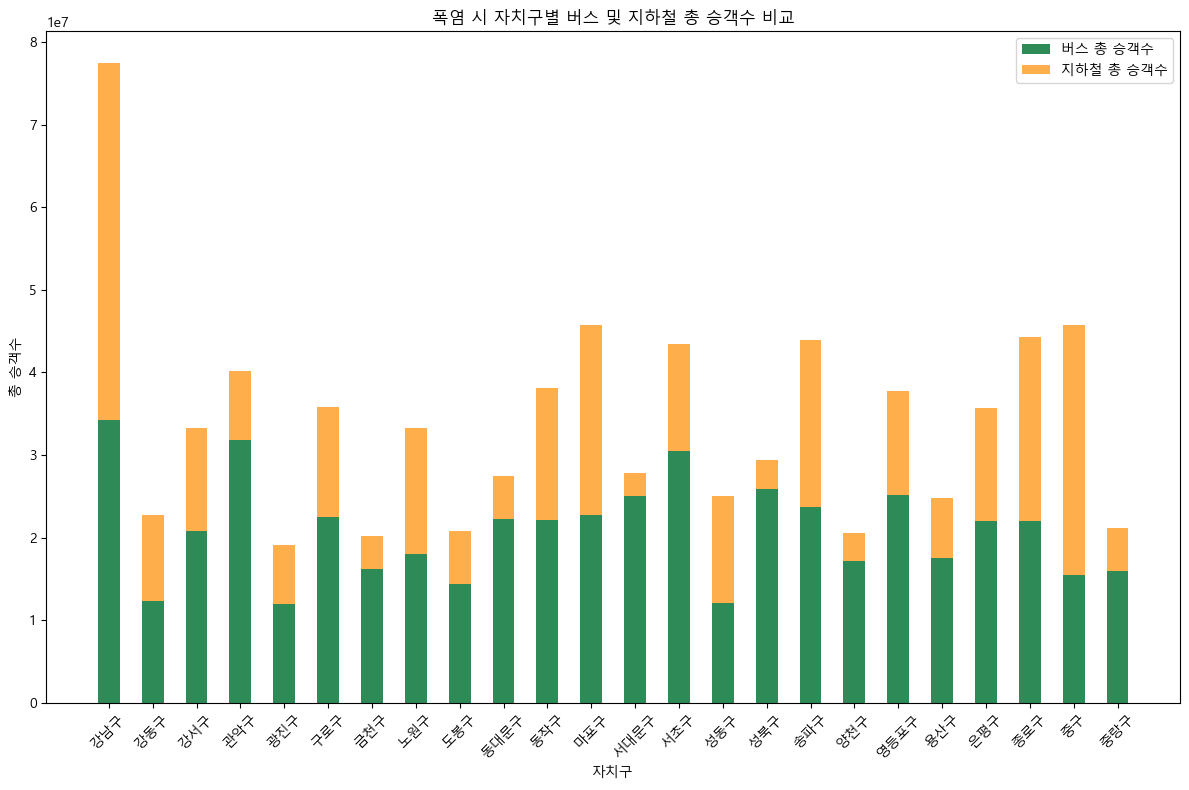

In [150]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 8))

# 자치구 리스트 생성
districts = merged_heat['자치구']

# 막대 그래프 너비 설정
bar_width = 0.5

# 막대 그래프 그리기
plt.bar(districts, merged_heat['버스 총승객수'], width=bar_width, color='seagreen', label='버스 총 승객수')
plt.bar(districts, merged_heat['지하철 총승객수'], width=bar_width, color='darkorange', alpha=0.7, label='지하철 총 승객수', bottom=merged_heat['버스 총승객수'])

plt.xlabel('자치구')
plt.ylabel('총 승객수')
plt.title('폭염 시 자치구별 버스 및 지하철 총 승객수 비교')
plt.xticks(rotation=45) # x축 눈금 라벨 회전
plt.legend() # 범례

# 파일로 저장
plt.savefig('heatwave_bar.png')

plt.tight_layout()
plt.show()

한파 데이터 비교

In [145]:
bus_cold = pd.read_csv("./bus_coldwave_total.csv")
sub_cold = pd.read_csv("./sub_coldwave_total.csv")

bus_cold.head()

,자치구,총승객수
0,강남구,8686489
1,강동구,3366560
2,강북구,5643998
3,강서구,5543687
4,관악구,8482194


In [146]:
bus_cold = bus_cold.rename(columns={'총승객수':'버스 총승객수'})
bus_cold.head()

,자치구,버스 총승객수
0,강남구,8686489
1,강동구,3366560
2,강북구,5643998
3,강서구,5543687
4,관악구,8482194


In [147]:
sub_cold = sub_cold.rename(columns={'총승객수':'지하철 총승객수'})
sub_cold.head()

,자치구,지하철 총승객수
0,강남구,10667877
1,강동구,2748700
2,강서구,3193718
3,고양시,119419
4,관악구,2132591


In [148]:
merged_cold = pd.merge(bus_cold, sub_cold, on='자치구')
merged_cold

,자치구,버스 총승객수,지하철 총승객수
0,강남구,8686489,10667877
1,강동구,3366560,2748700
2,강서구,5543687,3193718
3,관악구,8482194,2132591
4,광진구,3283317,1778507
5,구로구,5954170,3353515
6,금천구,4421245,1018492
7,노원구,4896104,3919784
8,도봉구,3915957,1617279
9,동대문구,6101492,1270552


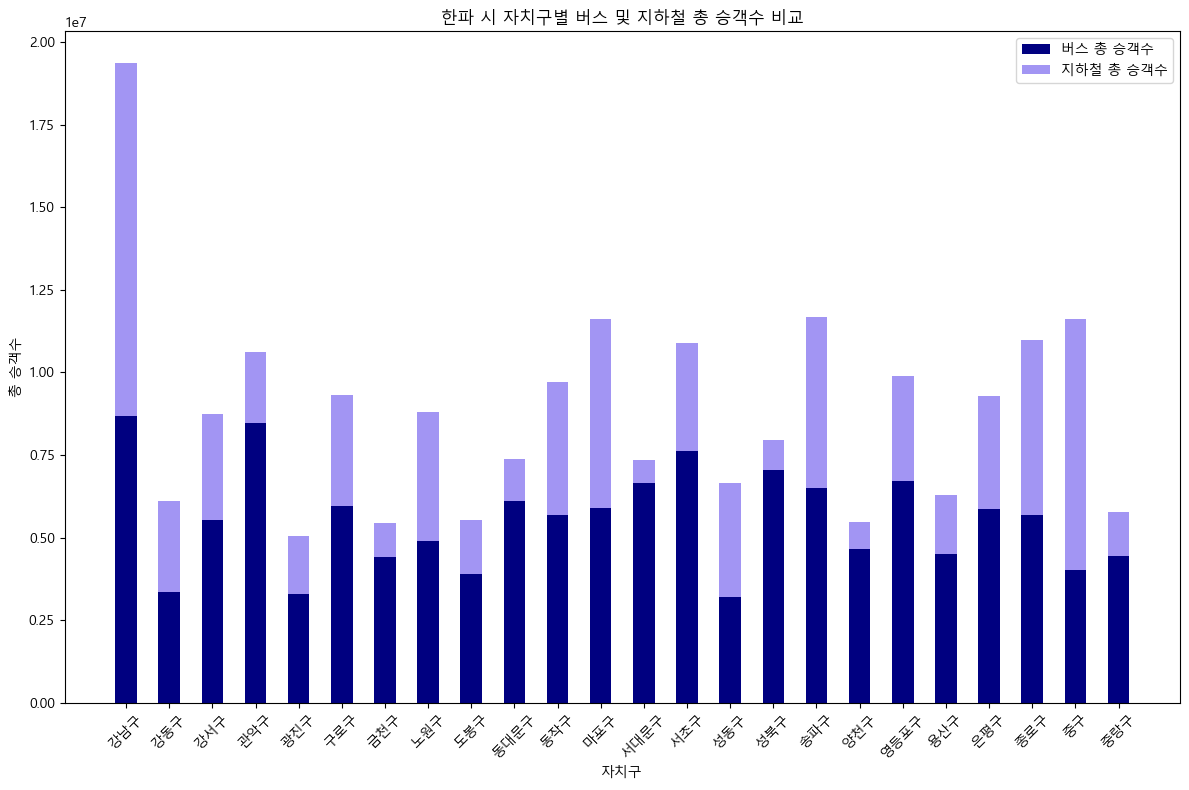

In [151]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 8))

# 자치구 리스트 생성
districts = merged_cold['자치구']

# 막대 그래프 너비 설정
bar_width = 0.5

# 막대 그래프 그리기
plt.bar(districts, merged_cold['버스 총승객수'], width=bar_width, color='navy', label='버스 총 승객수')
plt.bar(districts, merged_cold['지하철 총승객수'], width=bar_width, color='mediumslateblue', alpha=0.7, label='지하철 총 승객수', bottom=merged_cold['버스 총승객수'])

plt.xlabel('자치구')
plt.ylabel('총 승객수')
plt.title('한파 시 자치구별 버스 및 지하철 총 승객수 비교')
plt.xticks(rotation=45) # x축 눈금 라벨 회전
plt.legend() # 범례

# 파일로 저장
plt.savefig('coldwave_bar.png')

plt.tight_layout()
plt.show()

강수량 데이터 분석

In [153]:
bus_rain = pd.read_csv("./bus_precipitation_total.csv")
sub_rain = pd.read_csv("./sub_precipitation_total.csv")

bus_rain.head()

,자치구,총승객수
0,강남구,250735049
1,강동구,93228312
2,강북구,155683437
3,강서구,155295564
4,관악구,238588949


In [154]:
bus_rain = bus_rain.rename(columns={'총승객수':'버스 총승객수'})
bus_rain.head()

,자치구,버스 총승객수
0,강남구,250735049
1,강동구,93228312
2,강북구,155683437
3,강서구,155295564
4,관악구,238588949


In [155]:
sub_rain = sub_rain.rename(columns={'총승객수':'지하철 총승객수'})
sub_rain.head()

,자치구,지하철 총승객수
0,강남구,330393047
1,강동구,80849632
2,강서구,95329161
3,고양시,2870369
4,관악구,65131930


In [156]:
merged_rain = pd.merge(bus_rain, sub_rain, on='자치구')
merged_rain

,자치구,버스 총승객수,지하철 총승객수
0,강남구,250735049,330393047
1,강동구,93228312,80849632
2,강서구,155295564,95329161
3,관악구,238588949,65131930
4,광진구,89516324,54482638
5,구로구,167784340,104212923
6,금천구,121029910,30643177
7,노원구,138251854,118245868
8,도봉구,108768096,50180918
9,동대문구,170076754,40506025


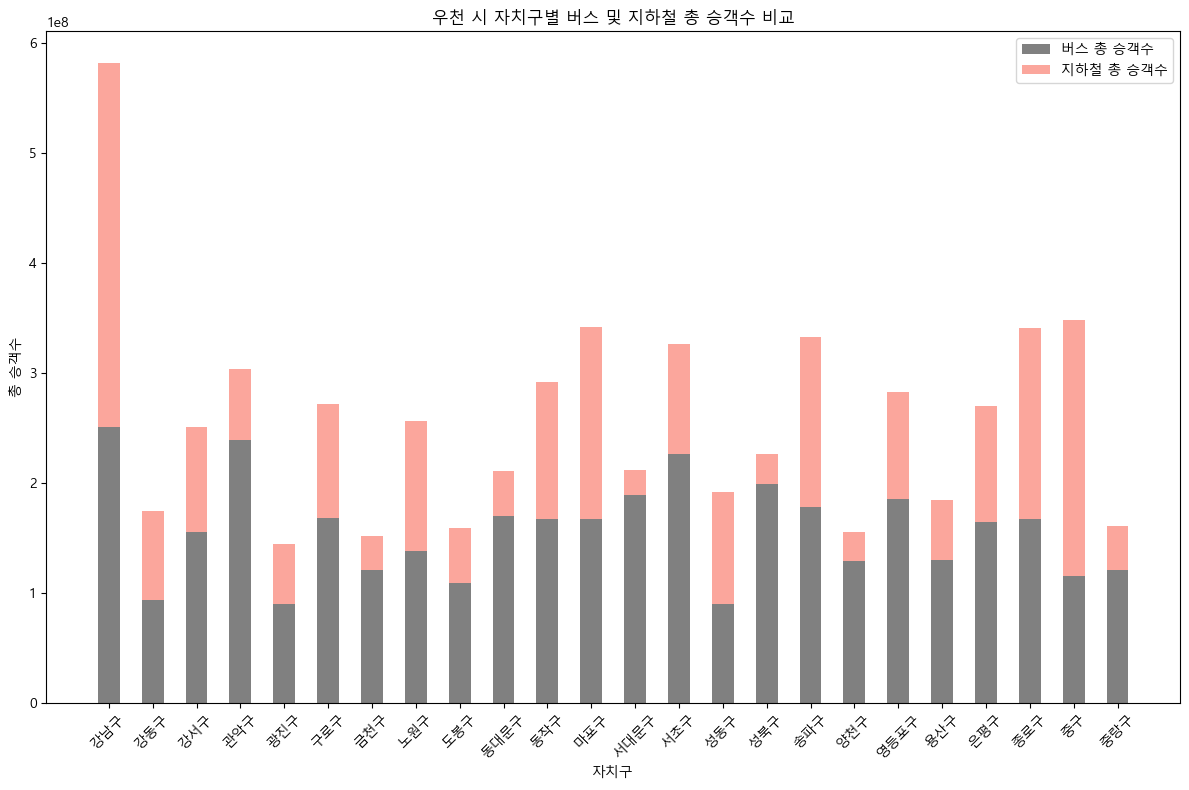

In [157]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 8))

# 자치구 리스트 생성
districts = merged_rain['자치구']

# 막대 그래프 너비 설정
bar_width = 0.5

# 막대 그래프 그리기
plt.bar(districts, merged_rain['버스 총승객수'], width=bar_width, color='grey', label='버스 총 승객수')
plt.bar(districts, merged_rain['지하철 총승객수'], width=bar_width, color='salmon', alpha=0.7, label='지하철 총 승객수', bottom=merged_rain['버스 총승객수'])

plt.xlabel('자치구')
plt.ylabel('총 승객수')
plt.title('우천 시 자치구별 버스 및 지하철 총 승객수 비교')
plt.xticks(rotation=45) # x축 눈금 라벨 회전
plt.legend() # 범례

# 파일로 저장
plt.savefig('precipitation_bar.png')

plt.tight_layout()
plt.show()